DEEP LEARNING

LAB-4

PRANSHU PARATE

202211063

MNIST Dataset

In [51]:
#import the packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [52]:
#import dataset
from keras.datasets import mnist

In [53]:
#load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [54]:
#printing the shape of train and test set
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [55]:
#count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [56]:
#count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


Data Visualizuation

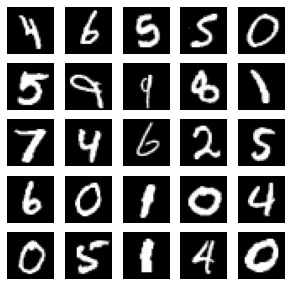

In [57]:
#sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

#plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [58]:
#compute the number of labels
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [59]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [60]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [61]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Data Preprocessing 

In [62]:
#image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [63]:
#resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [64]:
#network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [65]:
#Building the model
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 activation_9 (Activation)   (None, 256)               0         
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 activation_10 (Activation)  (None, 256)               0         
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [67]:
#compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [68]:
#fitting the model
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.4252 - accuracy: 0.8710
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1950 - accuracy: 0.9423
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1498 - accuracy: 0.9560
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1307 - accuracy: 0.9609
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1158 - accuracy: 0.9643
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1036 - accuracy: 0.9681
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0938 - accuracy: 0.9710
Epoch 8/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0878 - accuracy: 0.9734
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0798 - accuracy: 0.9748
Epoch 10/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0769 - accura

In [69]:
#evaluating model performance
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 4ms/step - loss: 0.0703 - accuracy: 0.9807

Test accuracy: 98.1%


Let's try with different batchsize

In [70]:
#network parameters
batch_size = 512
hidden_units = 256
dropout = 0.45

In [71]:
#fitting the model
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
118/118 [==============================] - 3s 23ms/step - loss: 0.0426 - accuracy: 0.9862
Epoch 2/20
118/118 [==============================] - 4s 30ms/step - loss: 0.0343 - accuracy: 0.9891
Epoch 3/20
118/118 [==============================] - 3s 25ms/step - loss: 0.0317 - accuracy: 0.9899
Epoch 4/20
118/118 [==============================] - 3s 23ms/step - loss: 0.0296 - accuracy: 0.9898
Epoch 5/20
118/118 [==============================] - 3s 22ms/step - loss: 0.0310 - accuracy: 0.9901
Epoch 6/20
118/118 [==============================] - 3s 23ms/step - loss: 0.0298 - accuracy: 0.9899
Epoch 7/20
118/118 [==============================] - 4s 33ms/step - loss: 0.0283 - accuracy: 0.9902
Epoch 8/20
118/118 [==============================] - 3s 23ms/step - loss: 0.0291 - accuracy: 0.9910
Epoch 9/20
118/118 [==============================] - 3s 22ms/step - loss: 0.0275 - accuracy: 0.9912
Epoch 10/20
118/118 [==============================] - 3s 22ms/step - loss: 0.0258 - accura

In [72]:
#evaluating model performance
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

20/20 [==============================] - 0s 9ms/step - loss: 0.0631 - accuracy: 0.9838

Test accuracy: 98.4%


In [73]:
# network parameters
batch_size = 64
hidden_units = 256
dropout = 0.45

In [74]:
#fitting the model
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0911 - accuracy: 0.9728
Epoch 2/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0638 - accuracy: 0.9792
Epoch 3/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0592 - accuracy: 0.9808
Epoch 4/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0549 - accuracy: 0.9823
Epoch 5/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0563 - accuracy: 0.9820
Epoch 6/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0545 - accuracy: 0.9827
Epoch 7/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0494 - accuracy: 0.9844
Epoch 8/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0554 - accuracy: 0.9825
Epoch 9/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0522 - accuracy: 0.9834
Epoch 10/20
938/938 [==============================] - 10s 10ms/step - loss: 0.0503 - accuracy: 0.98

In [75]:
#evaluating model performance
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

157/157 [==============================] - 1s 3ms/step - loss: 0.0735 - accuracy: 0.9815

Test accuracy: 98.2%


Reducing batch size means your model uses fewer samples to calculate the loss in each iteration of learning where as increasing batch size means your model uses more samples to calculate the loss in each iteration of learning. A higher batch size does not usually achieve high accuracy. In this dataset, the accuracy in small batch size and big batch size is almost same as evaluted above.

Let's try with different activation function

In [76]:
#network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [77]:
#Building the model
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('sigmoid'))

In [78]:
#compile the model
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [79]:
#fitting the model
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.0917 - accuracy: 0.8419
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0370 - accuracy: 0.9421
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0289 - accuracy: 0.9545
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0243 - accuracy: 0.9624
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0214 - accuracy: 0.9664
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0195 - accuracy: 0.9691
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0174 - accuracy: 0.9725
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0160 - accuracy: 0.9753
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0154 - accuracy: 0.9755
Epoch 10/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0142 - accura

In [80]:
#evaluating model performance
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9828

Test accuracy: 98.3%


In this dataset, when we change activation function as "sigmoid" and loss function as "binary cross entropy" there will same accuracy as evaluated above with "softmax + categorical cross entropy". As such, the neural network achieved 99% accuracy which is quite impressive with softmax. In this dataset because of epochs equal to 20 there will be 98% accuracy.

Let,s try with learning rate

In [81]:
#network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [82]:
#Building the model
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [83]:
from keras.optimizers import SGD 
opt = SGD(lr = 0.01)

In [84]:
#compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer=opt,
              metrics=['accuracy'])

In [85]:
#fitting the model
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 1.5671 - accuracy: 0.5057
Epoch 2/20
469/469 [==============================] - 4s 10ms/step - loss: 0.8218 - accuracy: 0.7466
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.6355 - accuracy: 0.8034
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.5450 - accuracy: 0.8363
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4891 - accuracy: 0.8520
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4494 - accuracy: 0.8653
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4224 - accuracy: 0.8731
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3963 - accuracy: 0.8827
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3772 - accuracy: 0.8875
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3607 - accuracy: 0

In [86]:
#evaluating model performance
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 6ms/step - loss: 0.1678 - accuracy: 0.9498

Test accuracy: 95.0%


The learning rate affects how quickly our model can converge to a local minima (arrive at the best accuracy) i.e 95% in this dataset.